In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_2019 = "Resources/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv"
df_2019 = pd.read_csv(file_2019)
df_2019.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [32]:
df_2019.columns

Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that lea

In [33]:
reduced_df_2019 = df_2019.loc[:, ["What country do you *work* in?", "What US state or territory do you *work* in?", "What is your age?", "What is your gender?", "Do you *currently* have a mental health disorder?", "*If possibly, what disorder(s) do you believe you have?*", "*If so, what disorder(s) were you diagnosed with?*", "Do you have a family history of mental illness?", "Have your previous employers provided mental health benefits?", "Was your employer primarily a tech company/organization?", "How many employees does your company or organization have?"]]

In [34]:
renamed_df_2019 = reduced_df_2019.rename(columns={
    "What country do you *work* in?" : "Country",
    "What US state or territory do you *work* in?": "State",
    "What is your age?": "Age",
    "What is your gender?": "Gender",
    "Do you *currently* have a mental health disorder?": "Mental Disorder",
    "*If possibly, what disorder(s) do you believe you have?*": "Specific Disorder",
    "*If so, what disorder(s) were you diagnosed with?*": "Diagnosed Disorder",
    "Do you have a family history of mental illness?":"Family History",
    "Have your previous employers provided mental health benefits?": "Previous Benefits Provided",
    "Was your employer primarily a tech company/organization?": "Tech Company",
    "How many employees does your company or organization have?": "Company Size"
})
renamed_df_2019.head()

,Country,State,Age,Gender,Mental Disorder,Specific Disorder,Diagnosed Disorder,Family History,Previous Benefits Provided,Tech Company,Company Size
0,United States of America,Nebraska,25,Male,Don't Know,NaN,NaN,No,I don't know,False,26-100
1,United States of America,Nebraska,51,male,Possibly,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,Yes,"Yes, they all did",False,26-100
2,United States of America,Illinois,27,Male,No,NaN,NaN,I don't know,I don't know,True,26-100
3,United States of America,Nebraska,37,male,No,NaN,NaN,Yes,I don't know,True,100-500
4,United States of America,Nebraska,46,m,No,NaN,NaN,No,I don't know,True,26-100


In [35]:
renamed_df_2019["Specific Disorder"].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                             10
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                           10
Mood Disorder (Depression, Bipolar Disorder, etc), Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                         9
Anxiety Disorder (Generalized, Social, Phobia, etc), Mood Disorder (Depression, Bipolar Disorder, etc)                                                                               

In [36]:
renamed_df_2019["Diagnosed Disorder"].fillna(("None"))

0                                                   None
1                                                   None
2                                                   None
3                                                   None
4                                                   None
                             ...                        
347                                                 None
348                                                 None
349                                                 None
350                                                 None
351    Anxiety Disorder (Generalized, Social, Phobia,...
Name: Diagnosed Disorder, Length: 352, dtype: object

In [37]:
renamed_df_2019

,Country,State,Age,Gender,Mental Disorder,Specific Disorder,Diagnosed Disorder,Family History,Previous Benefits Provided,Tech Company,Company Size
0,United States of America,Nebraska,25,Male,Don't Know,NaN,NaN,No,I don't know,False,26-100
1,United States of America,Nebraska,51,male,Possibly,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,Yes,"Yes, they all did",False,26-100
2,United States of America,Illinois,27,Male,No,NaN,NaN,I don't know,I don't know,True,26-100
3,United States of America,Nebraska,37,male,No,NaN,NaN,Yes,I don't know,True,100-500
4,United States of America,Nebraska,46,m,No,NaN,NaN,No,I don't know,True,26-100
...,...,...,...,...,...,...,...,...,...,...,...
347,India,NaN,27,male,Possibly,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,No,"No, none did",False,More than 1000
348,United States of America,Louisiana,48,m,No,NaN,NaN,No,"No, none did",False,NaN
349,India,NaN,50,M,No,NaN,NaN,No,NaN,NaN,NaN
350,India,NaN,30,female,Possibly,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,No,"No, none did",True,More than 1000


Text(0.5, 1.0, 'Types of Mood Disorders (2019)')

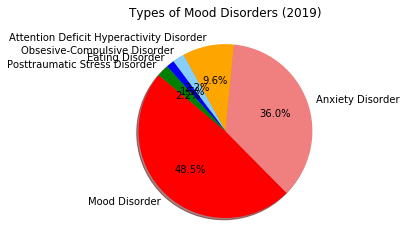

In [53]:
specific_disorder = df_2019["*If possibly, what disorder(s) do you believe you have?*"]
specific_disorder = df_2019["*If so, what disorder(s) were you diagnosed with?*"]
results = pd.merge(specific_disorder, specific_disorder)
specific_disorder.value_counts()
labels = ["Mood Disorder", "Anxiety Disorder", "Attention Deficit Hyperactivity Disorder", "Obsesive-Compulsive Disorder", "Eating Disorder", "Posttraumatic Stress Disorder"]
specific_disorder = [66, 49, 13, 3, 2, 3 ]
colors = ["red", 'lightcoral', 'orange', 'lightskyblue', 'blue', 'green']
plt.pie(specific_disorder, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Types of Mood Disorders (2019)")

Text(0.5, 1.0, 'Top Five Countries with Mental Disorders (2019)')

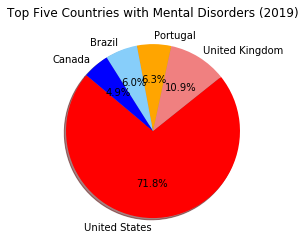

In [57]:
renamed_df_2019["Country"].value_counts()
labels = ["United States", "United Kingdom", "Portugal", "Brazil", "Canada"]
specific_disorder = [204, 31, 18, 17, 14 ]
colors = ["red", 'lightcoral', 'orange', 'lightskyblue', 'blue']
plt.pie(specific_disorder, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top Five Countries with Mental Disorders (2019)")

In [ ]:
#for the columns to merge do an if then statement and then loop it and create a fourth column
#and use try and accept and say if there are three different 
#mean age to the country (maybe top three countries )
    # create a bar graph for this 
    #maybe have to put the age gaps into bins 